In [ ]:
More questions: relative normalised expression vs fold change? e.g. fz empty? Why some negative?

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.optimize import minimize


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/Users/rosamartinezcorral/opt/anaconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/rosamartinezcorral/opt/anaconda3/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/Users/rosamartinezcorral/opt/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/Users/rosamartinezcorral/opt/anaconda3/lib/python3.9/site-packages/traitlets/config/applicat

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/Users/rosamartinezcorral/opt/anaconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/rosamartinezcorral/opt/anaconda3/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/Users/rosamartinezcorral/opt/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/Users/rosamartinezcorral/opt/anaconda3/lib/python3.9/site-packages/traitlets/config/applicat

AttributeError: _ARRAY_API not found

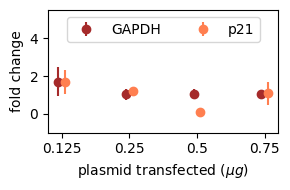

In [3]:
#Data from 1023_qRTPCR_squelchingSP1wt_20210224.xlsx
#Qhow is the normalisation done here? should actin just be used to normalise?
squelching={"concentration":[0.125,0.25,0.5,0.75,1.0,0.125,0.25,0.5,0.75,1.0,0.125,0.25,0.5,0.75,1.0,0.125,0.25,0.5,0.75,1.0],
            "nfc":[1.04276,1.06080,0.66618,0.99527,0.75658,1.70281,1.03047,1.05512,1.03177,2.06410,0.58311,0.40589,1.33513,0.34642,0.33735,1.68725,1.23252,0.08754,1.08249,4.37638],
            "SD":[0.25460,0.36553,0.10874,0.52364,0.16439,0.76679,0.30947,0.28623,0.09751,1.01504, 0.02819,0.00004,0.11196,0.14139,0.08502,0.64039,0.07992,0.01356,0.59203,0.17000],
            "target":["actin","actin","actin","actin","actin","GAPDH","GAPDH","GAPDH","GAPDH","GAPDH","GFP","GFP","GFP","GFP","GFP","p21","p21","p21","p21","p21"]}

squelchingdf=pd.DataFrame(squelching)
colors=["brown", "coral"]
fig,ax=plt.subplots(1,1,figsize=(3,2))
for t,target in enumerate(["GAPDH", "p21"]):
    subdf=squelchingdf[squelchingdf["target"]==target]
    conc=subdf["concentration"]
    nfc=subdf["nfc"]
    SD=subdf["SD"]
    if t==0:
        offset=-0.05
    else:
        offset=0.05
    ax.errorbar(np.arange(len(conc))+offset,nfc,yerr=SD,fmt='o',label=target,c=colors[t])
ax.set_xticks(np.arange(len(conc)))
ax.set_xticklabels(conc)
ax.set_xlabel("plasmid transfected ($\mu g$)")
#ax.axvspan(-0.2,3.2,facecolor="lightgray",edgecolor="white")
ax.legend(loc="upper center",ncol=2)
ax.set_ylabel("fold change")
ax.set_xlim(-0.2,3.2)
ax.set_ylim(-1,5.5)
plt.tight_layout()
#plt.savefig("../../duality/figs/squelchingnew.svg",bbox_inches="tight")
plt.show()

In [4]:
#commented is from dhana
#this is the best experiment
SP1_wt_2020709={0.125:1.68559,0.25:2.84942,0.5:3.74315,0.75:2.76530, 1:2.74082} #fold change
ZF_2020709={0.125:0.02466,0.25:0.05381,0.5:0.34476,0.75:0.46896,1:0.25200} #normalised expression, not fold change. Note that it is going down from 0.75 to 1, but expression is going down from 0.5 to 0.75, when the ZF is clearly going up

#this should be used as backup as in some datapoints only 2 measurements instead of three. Plus, data swapped. 
SP1_wt_20201019={0.125:0.71226,0.25:1.95223,0.5:2.62698,0.75:1.08696,1:0.97963}
ZF_20201019={0.125:0.80526,0.25:0.37440,0.5:6.58052,0.75:7.49619, 1: 6.48925} #this needs to be clarified. 



meanGFP [1.198925 2.400825 3.185065 1.92613 ]


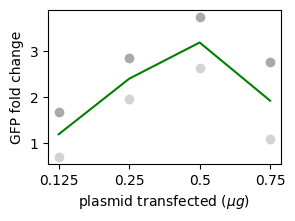

meanZF [ 1.          1.32350962 11.07622745 14.16303113]


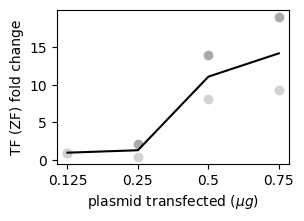

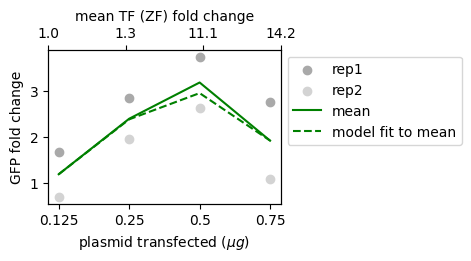

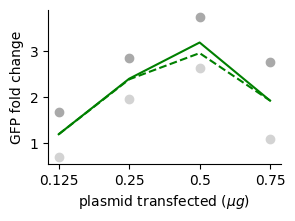

In [8]:
#now plot input on one plot, output on another

dict1wt=SP1_wt_2020709
dict2wt=SP1_wt_20201019
xvals=np.asarray([x[0] for x in dict1wt.items()][0:-1])
SP1_1=np.asarray([x[1] for x in dict1wt.items()][0:-1])
SP1_2=np.asarray([x[1] for x in dict2wt.items()][0:-1])
meanGFP=(SP1_1+SP1_2)/2
print("meanGFP", meanGFP)

fig1,ax1=plt.subplots(1,1,figsize=(3,2))
ax1.scatter(range(len(xvals)),SP1_1,color="darkgray")
ax1.scatter(range(len(xvals)),SP1_2,color="lightgray")
ax1.plot(range(len(xvals)),meanGFP,color="green")
ax1.set_xlabel("plasmid transfected ($\mu g$)")
ax1.set_ylabel("GFP fold change",color="k")
ax1.set_xticks(range(len(xvals)))
ax1.set_xticklabels(xvals)
#plt.savefig("../../duality/figs/input-output_mean.svg",bbox_inches="tight")
plt.show()    


dict1ZF=ZF_2020709
dict2ZF=ZF_20201019
xvals=np.asarray([x[0] for x in dict1ZF.items()][0:-1])
ZF_1=np.asarray([x[1] for x in dict1ZF.items()][0:-1])
ZF_1=ZF_1/ZF_1[0]
ZF_2=np.asarray([x[1] for x in dict2ZF.items()][0:-1])
ZF_2=ZF_2/ZF_2[0]
meanZF=(ZF_1+ZF_2)/2
print("meanZF", meanZF)
fig2,ax2=plt.subplots(1,1,figsize=(3,2))
ax2.scatter(range(len(xvals)),ZF_1,color="darkgray")
ax2.scatter(range(len(xvals)),ZF_2,color="lightgray")
ax2.plot(range(len(xvals)),meanZF,color="k")
ax2.set_xlabel("plasmid transfected ($\mu g$)")
ax2.set_ylabel("TF (ZF) fold change",color="k")
ax2.set_xticks(range(len(xvals)))
ax2.set_xticklabels(xvals)
#plt.savefig("../../duality/figs/input_mean.svg",bbox_inches="tight")
plt.show()

#model fit - notebook Fit_Sp1transfection
ymodelvals=np.array([1.19892499, 2.38762758, 2.95530254, 1.9271689])

fig1,ax1=plt.subplots(1,1,figsize=(3,2))
ax1.scatter(range(len(xvals)),SP1_1,color="darkgray", label="rep1")
ax1.scatter(range(len(xvals)),SP1_2,color="lightgray", label="rep2")
ax1.plot(range(len(xvals)),meanGFP,color="green", label="mean")
ax1.plot(range(len(xvals)),ymodelvals,color="green",linestyle="--", label="model fit to mean")
ax1.set_xlabel("plasmid transfected ($\mu g$)")
ax1.set_ylabel("GFP fold change",color="k")
ax1.set_xticks(range(len(xvals)))
ax1.set_xticklabels(xvals)
ax1ty=ax1.twiny()
ax1ty.xaxis.set_ticks_position("top")
ax1ty.set_xticks(range(len(xvals)))
ax1ty.set_xticklabels(["%2.1f"%x for x in meanZF])
ax1ty.set_xlabel("mean TF (ZF) fold change")
ax1.legend(loc="upper left", bbox_to_anchor=(1,1))
#plt.savefig("../../duality/figs/input-output_mean.svg",bbox_inches="tight")
plt.show() 

fig1,ax1=plt.subplots(1,1,figsize=(3,2))
ax1.scatter(range(len(xvals)),SP1_1,color="darkgray", label="rep1")
ax1.scatter(range(len(xvals)),SP1_2,color="lightgray", label="rep2")
ax1.plot(range(len(xvals)),meanGFP,color="green", label="mean")
ax1.plot(range(len(xvals)),ymodelvals,color="green",linestyle="--", label="model fit to mean")
ax1.set_xlabel("plasmid transfected ($\mu g$)")
ax1.set_ylabel("GFP fold change",color="k")
ax1.set_xticks(range(len(xvals)))
ax1.set_xticklabels(xvals)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)

plt.savefig("../../duality/figs/Sp1tfit.pdf",bbox_inches="tight")
plt.show()    


#[dict2wt,dict2ZF,"navy"]

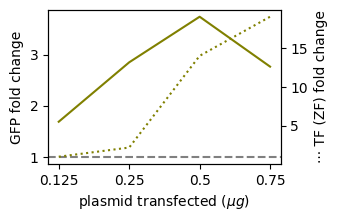

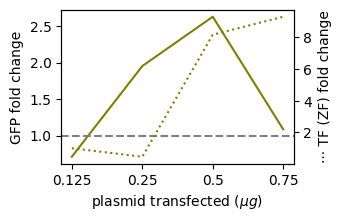

In [6]:
dict1wt=SP1_wt_2020709
dict1ZF=ZF_2020709

dict2wt=SP1_wt_20201019
dict2ZF=ZF_20201019




for d,data in enumerate([[dict1wt,dict1ZF,"olive"],[dict2wt,dict2ZF,"olive"]]):
    fig,ax=plt.subplots(1,1,figsize=(3,2))
    ax2=ax.twinx()

    dict1,dict2,color=data

    dict_=dict1
    
    xvals=[x[0] for x in dict_.items()][0:-1]
    yvals=[x[1] for x in dict_.items()][0:-1]
    ax.plot(range(len(xvals)),yvals,color=color)
    
    dict_=dict2
    xvals=[x[0] for x in dict_.items()][0:-1]
    yvals2=[x[1] for x in dict_.items()][0:-1]
    yvals2=np.array(yvals2)
    yvals2=yvals2/yvals2[0]
    
    ax2.plot(range(len(xvals)),yvals2,color=color,linestyle=":")
    ax2.set_ylabel("··· TF (ZF) fold change",color="k")
    ax.set_xlabel("plasmid transfected ($\mu g$)")
    ax.set_ylabel("GFP fold change",color="k")
    
    
    ax.axhline(y=1,linestyle="--",color="gray")
    #ax.set_xlim(0.1,0.8)
    ax.set_xticks(range(len(xvals)))
    ax.set_xticklabels(xvals)
    #ax.set_ylim(0,6)
    #plt.savefig("../../figscode/input-output_%d.svg"%d,bbox_inches="tight")
    plt.show()

#[dict2wt,dict2ZF,"navy"]

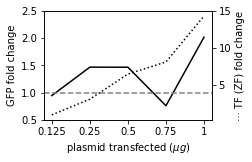

In [12]:
#ZFempty - Apparently something went wrong in 0.75- it is flagged red in the data that Dhana sent
xvals=[0.125,0.25,0.5,0.75,1]
Y1=[0.0321,0.04985,0.04982,0.02577,0.06857] #normalised expression at 0.125, 0.25, 0.5, 0.75, 1
Y1_ctrl=0.03395
Y2=[0.72323, 2.25614, 4.71068, 5.89768, 10.3888] #normalised ZF at 0.125...
fig,ax=plt.subplots(1,1,figsize=(3,2))
ax2=ax.twinx()


yvals=np.asarray(Y1)/Y1_ctrl
ax.plot(range(len(yvals)),yvals,color="k")


yvals2=Y2
yvals2=np.array(yvals2)
yvals2=yvals2/yvals2[0]

ax2.plot(range(len(yvals2)),yvals2,color="k",linestyle=":")
ax2.set_ylabel("··· TF (ZF) fold change",color="k")
ax.set_xlabel("plasmid transfected ($\mu g$)")
ax.set_ylabel("GFP fold change",color="k")


ax.axhline(y=1,linestyle="--",color="gray")
#ax.set_xlim(0.1,0.8)
ax.set_xticks(range(len(xvals)))
ax.set_xticklabels(xvals)
ax.set_ylim(0.5,2.5)
#plt.savefig("../../figscode/input-output_%d.svg"%d,bbox_inches="tight")
plt.show()